In [24]:
import pandas as pd
# Modification de l'option 'max_rows' des options d'affichage de pandas.
# Cela définit le nombre maximum de lignes que pandas affichera lorsque vous essayerez d'afficher un DataFrame.
# Ici, il est réglé sur 1000, ce qui signifie que pandas affichera jusqu'à 1000 lignes d'un DataFrame.
pd.options.display.max_rows = 1000

import matplotlib.pyplot as plt
# '%matplotlib inline' est une commande spécifique à Jupyter qui permet d'afficher les graphiques générés par matplotlib directement dans le notebook.
# Sans cette commande, vous devriez appeler explicitement plt.show() à chaque fois que vous voulez afficher un graphique.
%matplotlib inline

import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('Speed Dating Data.csv', encoding='ISO-8859-1')

In [26]:
# L'attribut shape du DataFrame df renvoie un tuple représentant les dimensions du DataFrame.
# Le premier élément du tuple est le nombre de lignes et le second élément est le nombre de colonnes.
df.shape

(8378, 195)

In [27]:
# Utilisation de la méthode info() du dataframe df
# Le paramètre verbose est défini sur True, ce qui signifie que la méthode info() va imprimer des informations
# sur toutes les colonnes. Si verbose est False ou non fourni, la méthode n'imprime des informations que sur les colonnes qui ne sont pas des catégories.
# Pour un dataframe de taille importante, cela peut aider à réduire la quantité d'informations imprimées.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

In [28]:
# La méthode isnull() de pandas vérifie chaque élément du DataFrame df pour voir s'il est nul (NaN)
# Elle retourne un DataFrame de booléens de la même taille que df.
# La méthode sum() est ensuite appliquée sur ce DataFrame de booléens, ce qui somme les valeurs True de chaque colonne
# Cela donne le nombre total de valeurs nulles dans chaque colonne du DataFrame df
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [29]:
# Supprime les virgules dans la colonne 'income' et convertit la colonne en float
df['income'] = df['income'].str.replace(',', '').astype(float)

# Maintenant, vous pouvez continuer avec le remplacement des valeurs manquantes comme avant
df.fillna({
    'age': round(df['age'].mean()),
    'income': round(df['income'].median()),
    'goal': df['goal'].mode()[0],
    'career': 'Unknown',
    'attr': round(df['attr'].mean()),
    'sinc': round(df['sinc'].mean()),
    'intel': round(df['intel'].mean()),
    'fun': round(df['fun'].mean()),
    'amb': round(df['amb'].mean()),
    'shar': round(df['shar'].mean()),
    'like': round(df['like'].mean()),
    'prob': round(df['prob'].mean()),
    'met': df['met'].mode()[0]
}, inplace=True)

In [30]:
# L'attribut shape du DataFrame df renvoie un tuple représentant les dimensions du DataFrame.
# Le premier élément du tuple est le nombre de lignes et le second élément est le nombre de colonnes.
df.shape

(8378, 195)

In [31]:
""""# Conversion des valeurs non numériques en NaN
df['career'] = pd.to_numeric(df['career'], errors='coerce')

# Imputation des valeurs manquantes avec la moyenne
mean_career = df['career'].mean()
df['career'].fillna(mean_career, inplace=True)

# Conversion de la colonne 'career' en float
df['career'] = df['career'].astype(float)

# Vérifiez le type de données de la colonne 'career' après conversion
print(df['career'].dtype)  # Le résultat devrait être de type float"""

'"# Conversion des valeurs non numériques en NaN\ndf[\'career\'] = pd.to_numeric(df[\'career\'], errors=\'coerce\')\n\n# Imputation des valeurs manquantes avec la moyenne\nmean_career = df[\'career\'].mean()\ndf[\'career\'].fillna(mean_career, inplace=True)\n\n# Conversion de la colonne \'career\' en float\ndf[\'career\'] = df[\'career\'].astype(float)\n\n# Vérifiez le type de données de la colonne \'career\' après conversion\nprint(df[\'career\'].dtype)  # Le résultat devrait être de type float'

In [32]:
df

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
1     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
2     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
3     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
4     ...      5.0      7.0       7.0     7.0     7.0      NaN      NaN   
...   ...      ...      ...       ...     ...     ...      ...      ...   
8373  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   
8374  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   
8375  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   
8376  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   
8377  ...      8.0      5.0       7.0     6.0     7.0      9.0      5.0   

      intel5_3  fun5_3  amb5_3  
0          NaN     NaN     NaN  
1          NaN     NaN     NaN  
2          NaN     NaN     NaN  
3          NaN     NaN     NaN  
4          NaN     NaN     NaN  
...        ...     ...     ...  
8373       9.0     5.0     6.0  
8374       9.0     5.0     6.0  
8375       9.0     5.0     6.0  
8376       9.0     5.0     6.0  
8377       9.0     5.0     6.0  

[8378 rows x 195 columns]

Text(0, 0.5, 'Count')

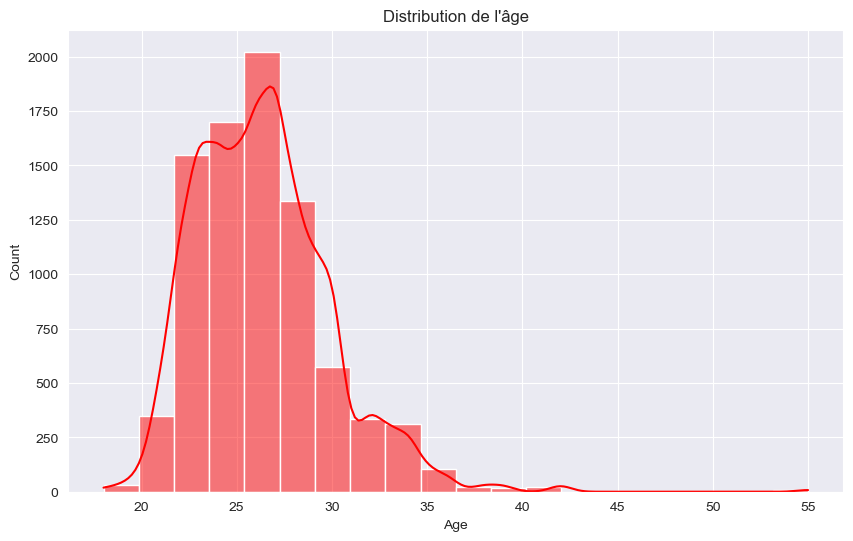

In [33]:
# Création d'une figure avec une taille spécifique
plt.figure(figsize=(10, 6))

# Tracé d'un histogramme des données d'âge, en supprimant les valeurs nulles.
# "bins=20" spécifie le nombre de barres d'histogramme,
# "kde=True" trace la densité de probabilité de fonction de distribution de noyau,
# et "color='red'" spécifie la couleur des barres d'histogramme.
sns.histplot(df['age'].dropna(), bins=20, kde=True, color='red')

# Définition du titre de l'histogramme
plt.title("Distribution de l'âge")

# Définition du label pour l'axe des x
plt.xlabel('Age')

# Définition du label pour l'axe des y
plt.ylabel('Count')

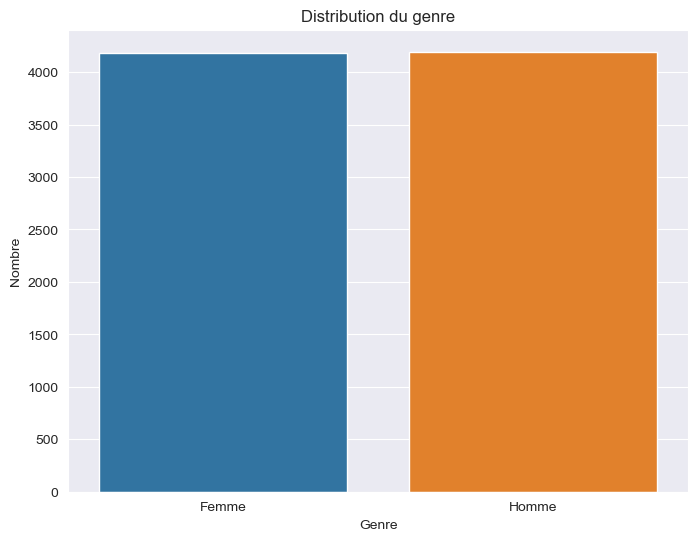

In [34]:
# Distribution du genre
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)  # Trace un graphique de comptage des genres
plt.title('Distribution du genre')  # Titre du graphique
plt.xlabel('Genre')  # Label de l'axe des x
plt.ylabel('Nombre')  # Label de l'axe des y
plt.xticks(ticks=[0, 1], labels=['Femme', 'Homme'])  # suppose que 0 -> femme, 1 -> homme
plt.show()  # Affiche le graphique

In [35]:
# Sélection de toutes les colonnes numériques du dataframe df
# Puis, calcul de la corrélation de Spearman entre ces colonnes.
# La corrélation de Spearman est une mesure de la relation monotone entre deux variables.
# Elle est 1 en cas de corrélation directe et -1 en cas de corrélation inverse
# La méthode corr() de pandas est utilisée pour calculer la corrélation
# Ensuite, le format des nombres est défini (2 chiffres après la virgule) avec format("{:.2}")
# Enfin, un gradient de couleurs est appliqué en fond pour rendre la visualisation plus lisible.
# Le cmap coolwarm est un gradient qui va du bleu (valeurs négatives - corrélation négative) au rouge (valeurs positives - corrélation positive)
df.select_dtypes(include=[np.number]).corr(method='spearman').style.format("{:.2}").background_gradient(
    cmap=plt.get_cmap('coolwarm'))

In [36]:
# La fonction crosstab de pandas est utilisée ici pour calculer une tabulation croisée simple (un comptage des fréquences)
# de deux (ou plus) facteurs. Par défaut, elle calcule une fréquence de table de deux facteurs, sauf indication contraire.
# Dans cet exemple, les lignes de la table sont basées sur les valeurs de 'match' dans le dataframe df et les colonnes ne sont
# qu'un simple comptage de ces valeurs (il n'y a qu'une seule colonne appelée 'counts').
pd.crosstab(index=df['match'], columns='counts')

col_0  counts
match        
0        6998
1        1380

([<matplotlib.axis.XTick at 0x16aec6a10>,
 [Text(0, 0, 'Non'), Text(1, 0, 'Oui')])

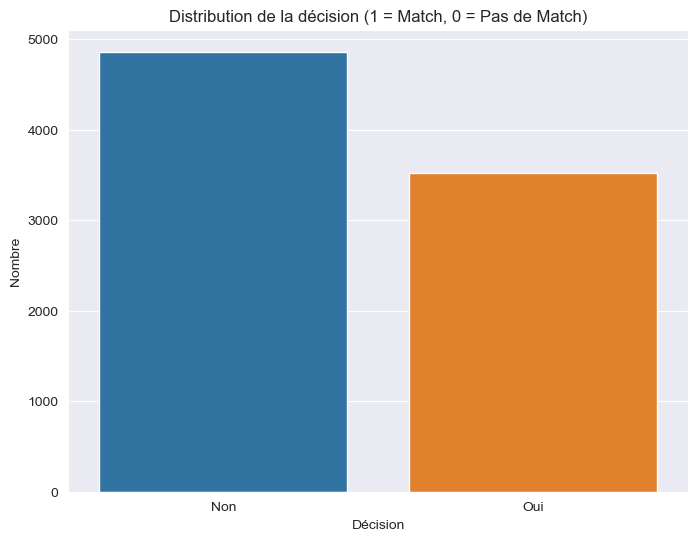

In [37]:
# Création d'une figure avec une taille spécifique
plt.figure(figsize=(8, 6))

# Tracé d'un graphique en barres qui compte le nombre de décisions de match ou de non-match.
# L'axe x correspond à la décision ('dec') et les données utilisées sont contenues dans le dataframe df
sns.countplot(x='dec', data=df)

# Définition du titre du graphique en barres
plt.title('Distribution de la décision (1 = Match, 0 = Pas de Match)')

# Définition du label pour l'axe des x
plt.xlabel('Décision')

# Définition du label pour l'axe des y
plt.ylabel('Nombre')

plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'])

Text(0, 0.5, 'Revenu')

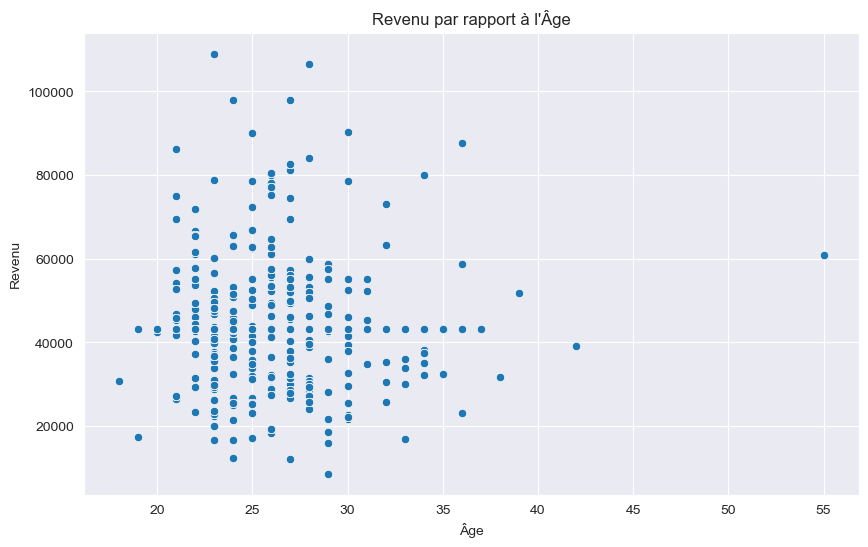

In [38]:
# Diagramme de dispersion : Revenu vs Âge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income',
                data=df)  # Trace un diagramme de dispersion avec l'âge sur l'axe des x et le revenu sur l'axe des y
plt.title('Revenu par rapport à l\'Âge')  # Titre du graphique

plt.xlabel('Âge')  # Label de l'axe des x

plt.ylabel('Revenu')  # Label de l'axe des y

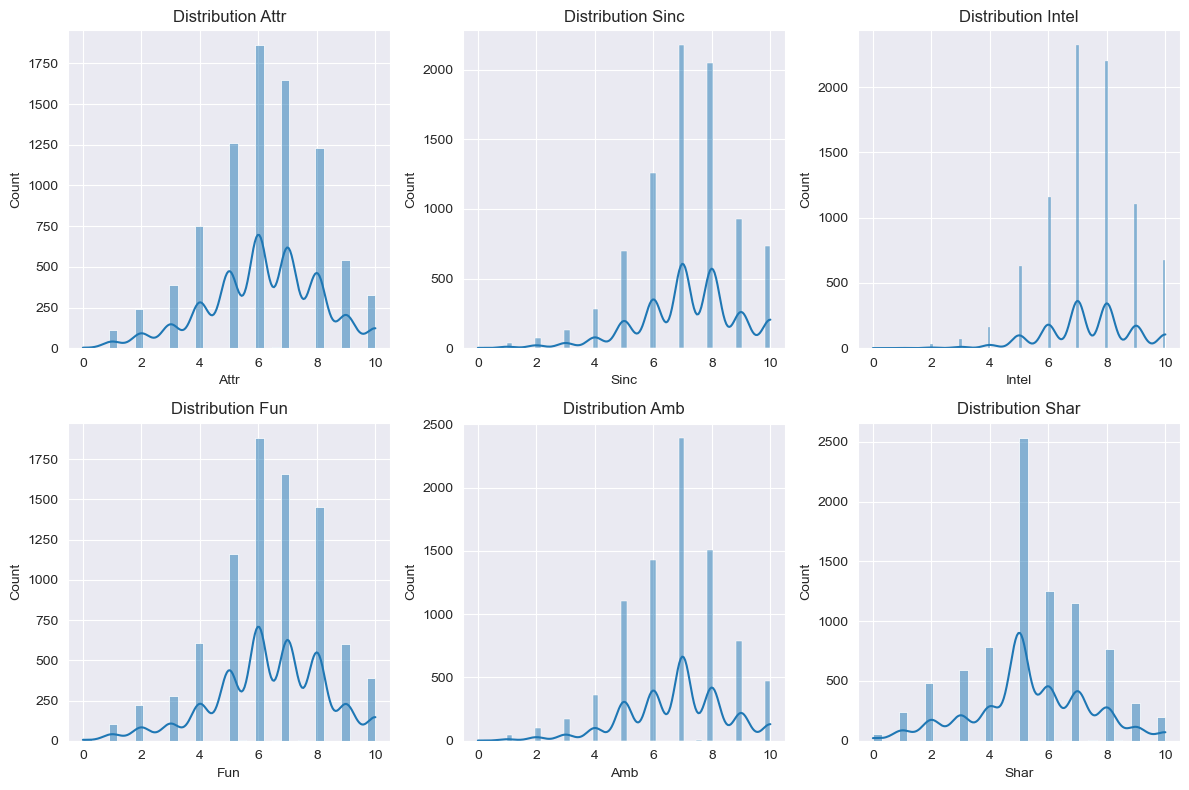

In [39]:
# Création d'une liste de colonnes pour les différents scores
score_cols = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Création d'une figure avec une taille spécifique
plt.figure(figsize=(12, 8))

# Parcours de chaque colonne dans la liste des scores
for i, col in enumerate(score_cols, 1):
    # Création d'un subplot pour chaque distribution
    plt.subplot(2, 3, i)
    # Tracé d'un histogramme pour chaque score, en supprimant les valeurs nulles
    sns.histplot(df[col].dropna(), kde=True)
    # Définition du titre de chaque histogramme
    plt.title('Distribution ' + col.capitalize())
    # Définition du label pour l'axe des x
    plt.xlabel(col.capitalize())
    # Définition du label pour l'axe des y
    plt.ylabel('Count')

# Ajustement automatique du padding entre les subfigures
plt.tight_layout()

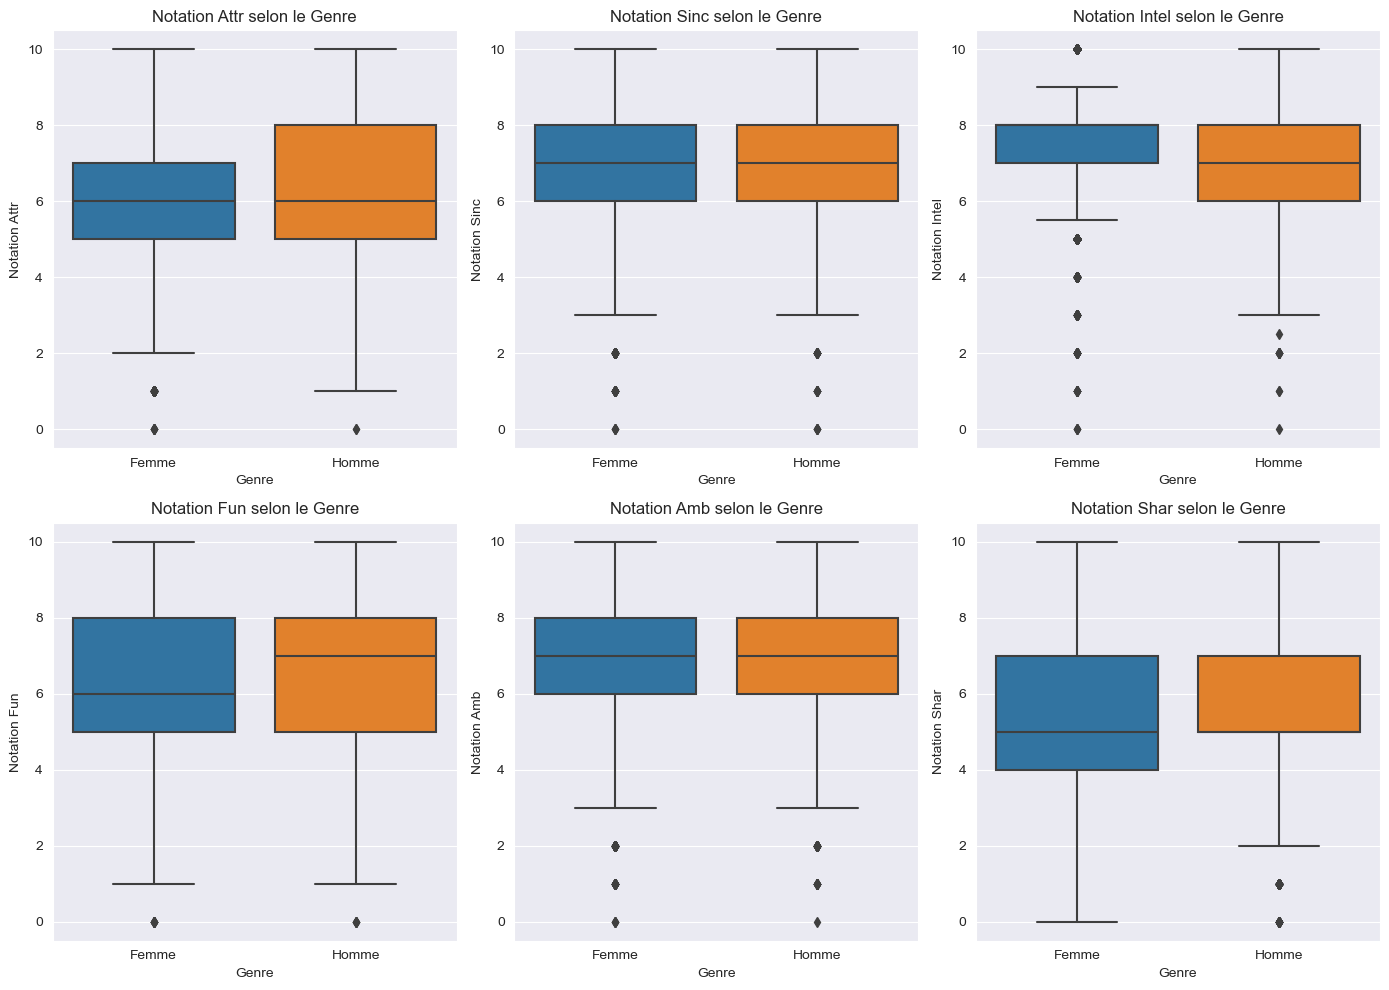

In [40]:
# Boîtes à moustaches des notations par genre
notations = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

plt.figure(figsize=(14, 10))  # Définit la taille du graphique
for i, notation in enumerate(notations, 1):  # Parcours chaque notation dans la liste des notations
    plt.subplot(2, 3, i)  # Sélectionne le sous-graphique i dans une grille 2x3
    sns.boxplot(x='gender', y=notation, data=df)  # Trace une boîte à moustaches de la notation par genre
    plt.title(f'Notation {notation.capitalize()} selon le Genre')  # Titre du sous-graphique
    plt.xlabel('Genre')  # Label de l'axe des x
    plt.ylabel(f'Notation {notation.capitalize()}')  # Label de l'axe des y
    plt.xticks(ticks=[0, 1], labels=['Femme', 'Homme'])

plt.tight_layout()  # Assure que les sous-graphiques ne se chevauchent pas

Text(0, 0.5, 'Age')

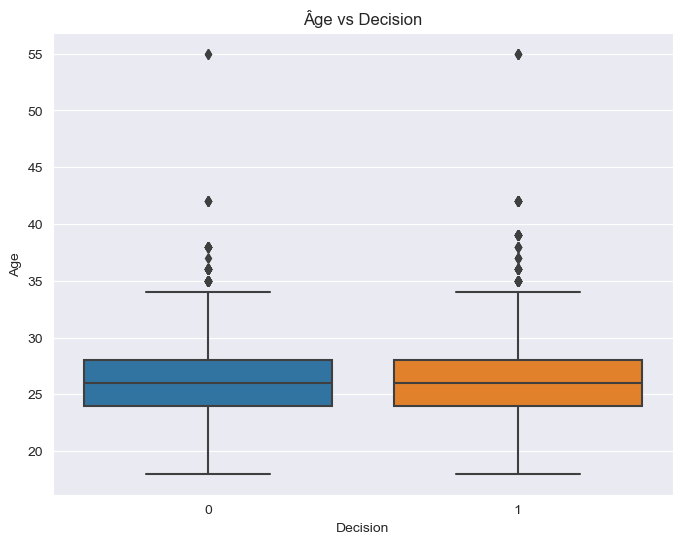

In [41]:
# Création d'une nouvelle figure avec la taille spécifiée (8,6)
plt.figure(figsize=(8, 6))

# Création d'un diagramme à moustaches (boxplot), en utilisant la bibliothèque seaborn (sns) qui est basée sur matplotlib
# 'dec' est l'variable sur l'axe x et 'age' est l' variable sur l'axe y. 'data' est le DataFrame d'où proviennent les données.
sns.boxplot(x='dec', y='age', data=df)

# Définition du titre du graphique
plt.title('Âge vs Decision')

# Définition des étiquettes des axes x et y
plt.xlabel('Decision')
plt.ylabel('Age')

Text(0, 0.5, 'Count')

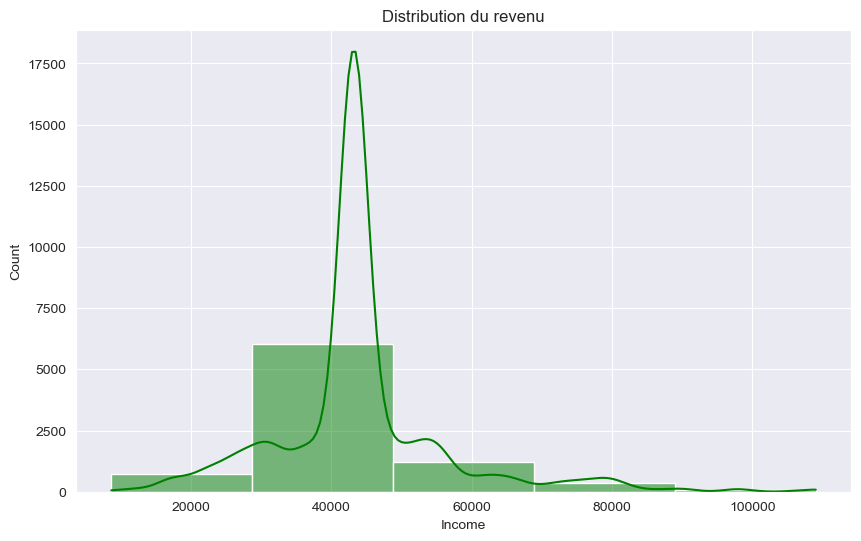

In [42]:
# Création d'une nouvelle figure avec la taille spécifiée (10,6)
plt.figure(figsize=(10, 6))

# Création d'un histogramme de la colonne 'income' du DataFrame df, en utilisant la bibliothèque seaborn (sns)
# Préalablement, la méthode dropna() est utilisée pour supprimer les valeurs manquantes de la colone 'income'.
# 'bins' représente le nombre de barres d'histogramme à afficher,
# 'kde=True' permet d'afficher une courbe de densité de Kernel sur l'histogramme,
# et 'color' définit la couleur des barres de l'histogramme.
sns.histplot(df['income'].dropna(), bins=5, kde=True, color='green')

# Définition du titre du graphique
plt.title('Distribution du revenu')

# Définition des étiquettes des axes x et y
plt.xlabel('Income')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

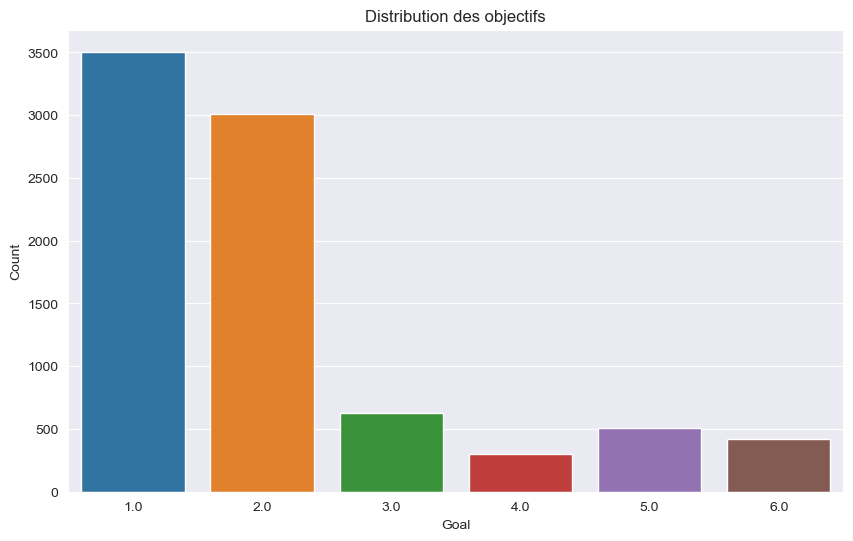

In [43]:
# Création d'une nouvelle figure avec une taille spécifiée (10,6)
plt.figure(figsize=(10, 6))

# Création d'un graphique de comptage (countplot), en utilisant la bibliothèque seaborn (sns)
# 'goal' est la variable catégorielle sur l'axe x, et 'data' est le DataFrame contenant les données.
sns.countplot(x='goal', data=df)

# Définition du titre du graphique
plt.title('Distribution des objectifs')

# Définition des étiquettes des axes x et y
plt.xlabel('Goal')
plt.ylabel('Count')

Text(0, 0.5, 'Career')

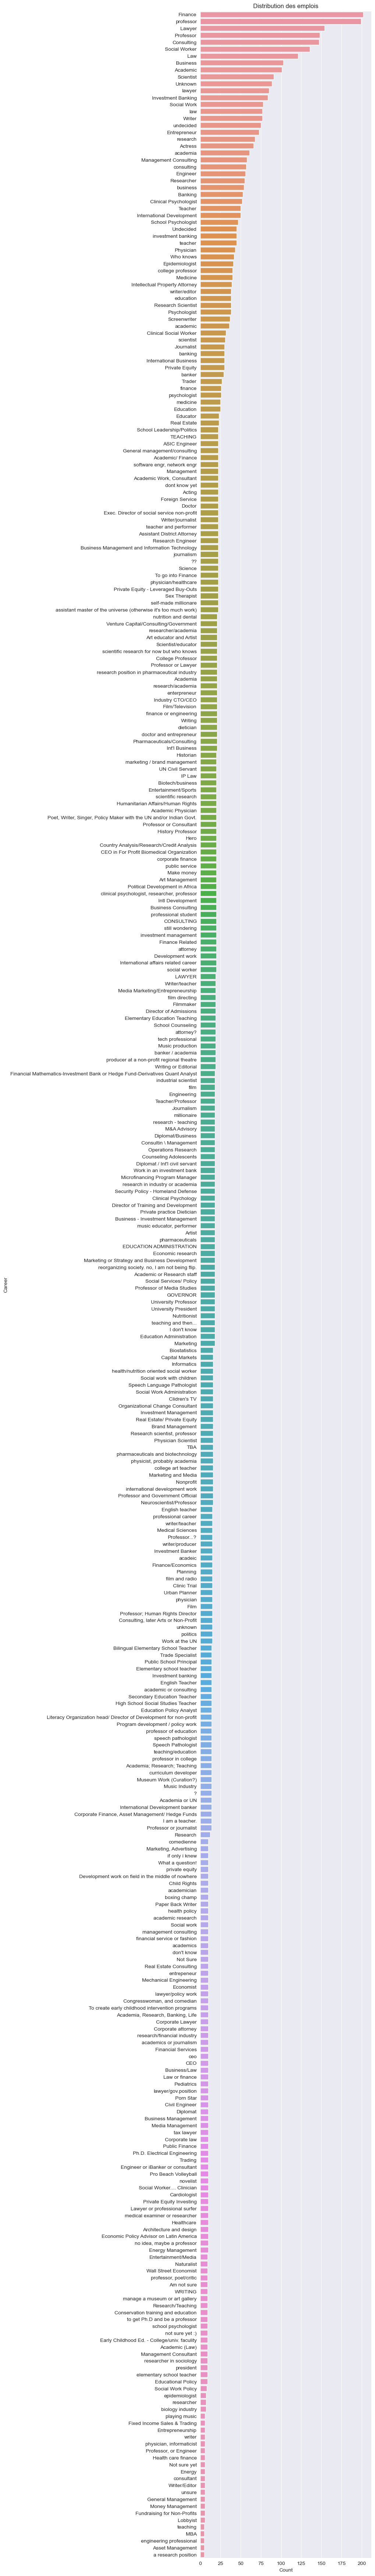

In [44]:
# Création d'une nouvelle figure avec une taille spécifiée (6,90)
plt.figure(figsize=(6, 90))

# Création d'un graphique de comptage (countplot), en utilisant la bibliothèque seaborn (sns)
# 'career' est la variable catégorielle sur l'axe y, et 'data' est le DataFrame contenant les données.
# L'ordre dans lequel les carrières sont affichées est défini par le nombre de fois qu'elles apparaissent dans le DataFrame (les plus fréquentes en haut)
sns.countplot(y='career', data=df, order=df['career'].value_counts().index)

# Définition du titre du graphique
plt.title('Distribution des emplois')

# Définition des étiquettes des axes x et y
plt.xlabel('Count')
plt.ylabel('Career')

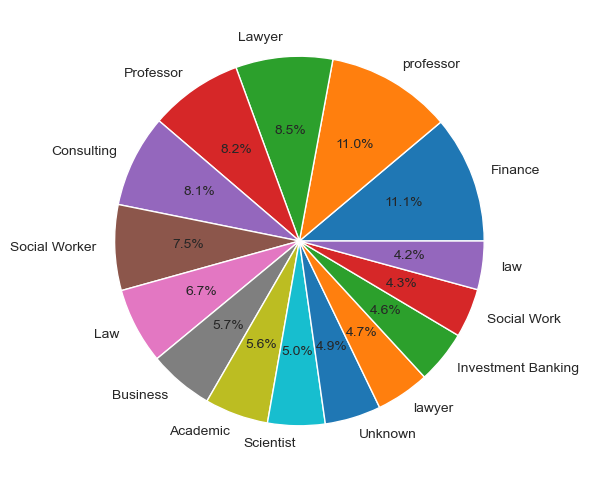

In [45]:
# The most repeated 15 emplois les + courants
plt.figure(figsize=(10, 6))
pie_chart = plt.pie(x=df["career"].value_counts().nlargest(15), labels=df["career"].value_counts().nlargest(15).index, autopct="%1.1f%%")

Text(0.5, 1.0, 'Correlation Heatmap')

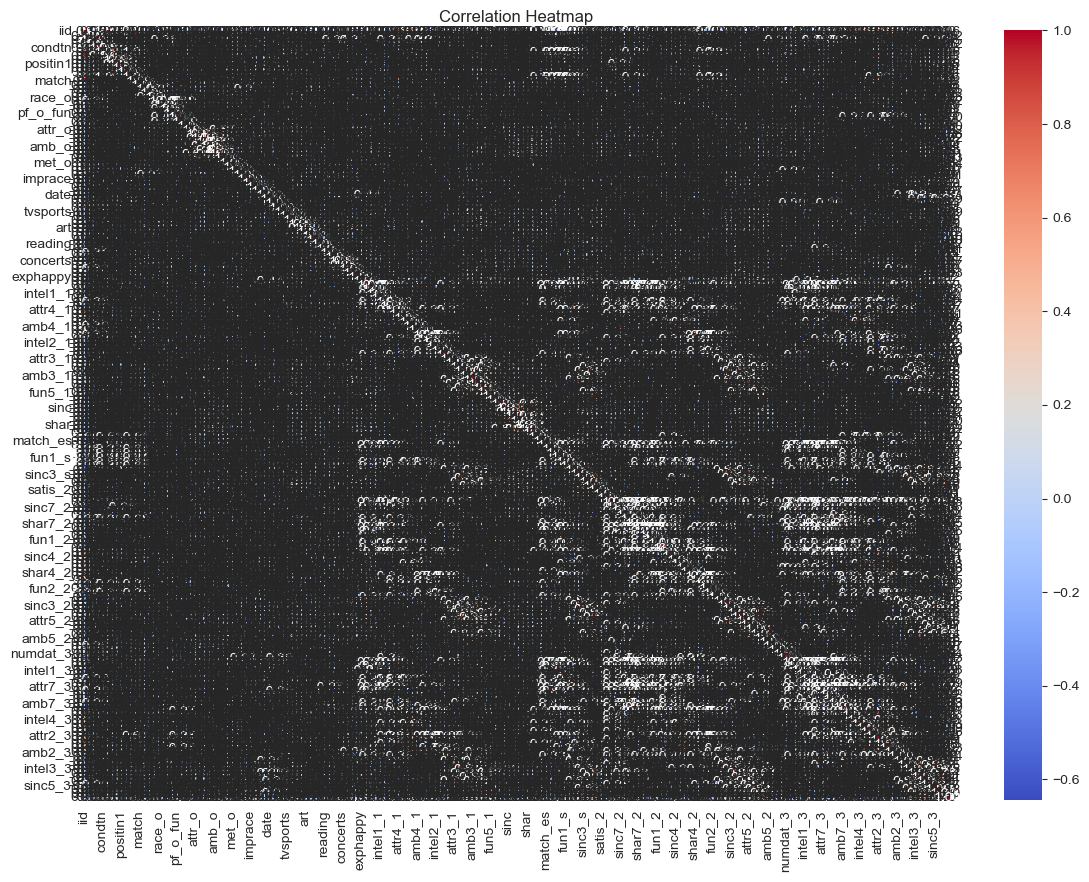

In [46]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate correlation matrix for numerical columns
corr_matrix = df[numerical_columns].corr()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')